In [1]:
#importando as bibliotecas necessárias
import geopandas as gpd
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lendo os shapefiles dos distritos
districts = gpd.read_file("dados/Districts/districts.shp")

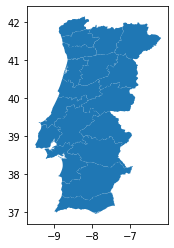

In [3]:
#Exibindo os distritos
districts.plot()

In [4]:
#Lendo o raster do dia 15-04-2020
imagem = rasterio.open("dados/Rainfall Data Rasters/2020-4-15.tif")

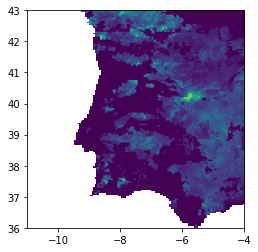

In [5]:
#Exibindo o raster
show(imagem)

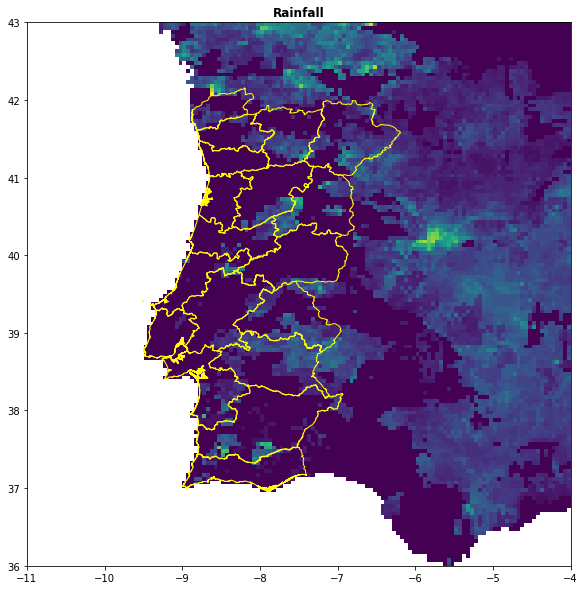

In [6]:
#Plotando o shape dos distritos e o raster juntos
fig, ax = plt.subplots(figsize = (10,10))
rasterio.plot.show(imagem, ax = ax, title = 'Rainfall')
districts.plot(ax = ax, facecolor='none', edgecolor = 'yellow')


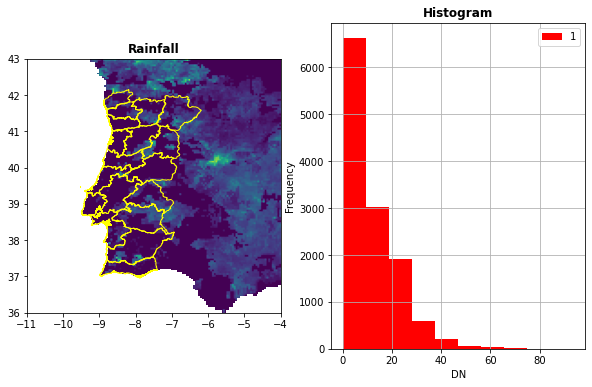

In [7]:
#Plotando o shape dos distritos e o raster juntos e também o histograma
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))
rasterio.plot.show(imagem, ax = ax1, title = 'Rainfall')
districts.plot(ax = ax1, facecolor='none', edgecolor = 'yellow')
show_hist(imagem, title = "Histogram", ax = ax2)
plt.show()

In [8]:
#Convertando o raster em uma array do numpy
rainfall_array = imagem.read(1)
#Passando as coordenadas para o array
affine = imagem.transform

In [9]:
#Visualizando os metadados do raster
imagem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 140,
 'height': 140,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0500000007451, 0.0, -11.0,
        0.0, -0.0500000007451, 43.0)}

In [10]:
#Calculando as estatisticas

In [11]:
avg_rf = zonal_stats(districts, rainfall_array, affine = affine, stats = ['mean'], geojson_out = True)

C:\Users\Hugo\miniconda3\envs\geoprocessamento\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [12]:
avg_rf[0]['properties']

{'NAME_1': 'Évora', 'mean': 10.884027523599613}